In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
import seaborn as sns

In [ ]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
y_train = y_train.flatten()
y_test = y_test.flatten()


In [19]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [7]:
input_shape = (32, 32, 3)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test=x_test / 255.0

In [8]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [28]:
batch_size = 32
num_classes = 10
epochs = 50

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
            loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs)

313/313 [==============================] - 14s 45ms/step - loss: 0.7044 - acc: 0.7697


In [ ]:
!mkdir -p saved_model
model.save('saved_model/my_model') 
!zip -r file.zip saved_model
files.download("file.zip")

In [ ]:
model.summary()

In [83]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 14s 44ms/step - loss: 0.7044 - acc: 0.7697
Test loss: 0.704352855682373
Test accuracy: 0.7696999907493591


In [78]:
def getPredictions(dataToPredict):
  result=[]
  rawData=model.predict(dataToPredict)
  for i in range (0,len(rawData)) :
    index=np.argmax(rawData[i])
    result.append(classes[index])
  return result


In [84]:
predictionData=getPredictions(x_test)

313/313 [==============================] - 14s 46ms/step


In [96]:
classes[np.argmax(predictions[20])]

'horse'

In [97]:
classes[np.argmax(y_test[20])]

'horse'

Text(0.5, 0, '[<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)>]')

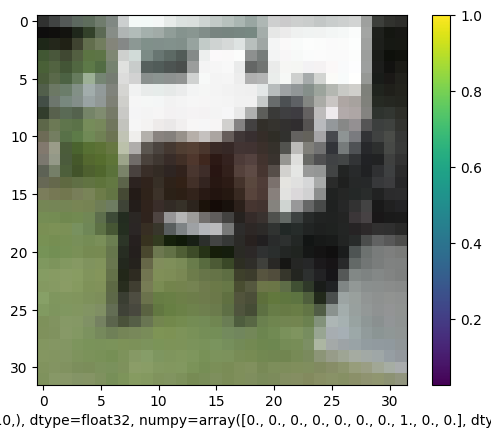

In [98]:
plt.figure()
plt.imshow(x_test[20])
plt.colorbar()
plt.grid(False)
plt.xlabel([y_test[20]])